# Вступительное задание в магистратуру НИЯУ МИФИ и Simulative. Лещук Дмитрий

## Описание кейса
Представьте, что вы работаете аналитиком в компании, которая продает сервис для аналитики, которым пользуются селлеры на маркетплейсах. 

Основная воронка продаж выглядит следующим образом:

1) Потенциальный клиент видит рекламу ВКонтакте, что скоро пройдет вебинар на актуальную тему (например, “Как селлеру увеличить выручку с помощью аналитики”)
2) Человек кликает на рекламу и переходит на сайт компании
3) Если ему понравилось описание вебинара - он заполняет форму на сайте и регистрируется на вебинар
4) После заполнения формы его редиректит в Telegram-бота, куда приходят все подробности про вебинар (например, ссылка для подключения к трансляции)
5) Спустя какое-то время в бота приходит ссылка и человек может подключиться к трансляции 
6) Во время вебинара эксперт рассказывает полезный контент и продает сервис, рассказывая про его функционал и предлагает скидку
7) Часть людей нажимает на кнопку во время вебинара и оставляет заявку на бронь скидки
8) С ними связывается менеджер и они вносят оплату
9) Подписка ежемесячная, поэтому далее менеджер ежемесячно связывается с клиентами и выставляет счет на продление подписки

## Задание


### 1) Маркетологи посчитали конверсию из регистраций на вебинар в оставление заявки во время вебинара и она получилась очень низкая. Напишите несколько гипотез - с чем это может быть связано и как с этим можно работать? 

Подсегмент воронки выглядит следующим образом: 1) Заполнить форму регистрации -> 2) Зайти в бота -> 3) Через время получить оповещение от бота и кликнуть по ссылке вебинара -> 4) Досмотреть вебинар до этапа, где предлагают скидку -> 5) Оставить заявку на скидку. Рассмотрим его поэтапно.

1. Между этапами 1-2 может произойти техническая проблема: если наш целевой клиент не авторизован в данный момент в телеграме и оставил не полностью верные контактные данные, он может просто не попасть в бота (редирект не произошел в моменте, пуш от бота по контактным данным клиента не догнал). Возможно, стоит вшить автоматический сценарий проверки данных (регистрация заполнена -> человек подписан на бота), поставить процесс "оповестить клиентов по e-mail, если они заявку оставляли, но на бота почему-то не подписаны". Это низкозатратное решение (1 раз написать сценарий), которое оправдано, если реально конверсия из заполнения формы в подписку на бота не 100%.

2. В ситуации с переходом в вебинар пункт (3) ситуация двоякая. Может возникнуть две противоположные ситуации: 1) клиента перепушили сообщениями от бота и он решил не идти на вебинар (у меня был такой кейс, я регистрировался на вебинар и получил 20 сообщений за 2 дня, я просто забанил бота и не стал отвечать на звонки менеджера по продажам); 2) клиента недопушили сообщениями и он забыл про вебинар. Здесь надо смотреть на данные по перегретости клиента сообщениями (можно построить индикатор перегретости, я делал такой по logit-модели с open-rate, click-rate), если клиент не перегрет, аккуратно его пушить напоминаниями о вебинаре и доп. информацией (не продающей, а экспертной, продажа на следующем этапе воронки), если клиент перегрет, то наоборот просто ссылку в установленное время.

3. Переход 3) - 4) если клиент зашел на вебинар, но у него возникли технические проблемы, он может просто сразу же покинуть вебинар. Можно настроить менеджеру вебинара трекер "перешел по ссылке - ушел с трансляции", чтоб он догонял лично таких людей: не все люди, столкнувшиеся с техническими проблемами, напишут об этом. Аудитория может быть холодно настроена к вебинару, пока не послушает самого спикера.

4. Не все досматривают вебинар до места, где спикер предлагает скидку. Тут нужно смотреть на метрики доходимости и выдвинуть ряд продуктовых гипотез к спикеру: 1) достаточно ли спикер работает с аудиторией, есть ли вовлечение от нее? Возможно, добавить больше интерактивного содержания. 2) хорошо ли структурирован материал? 3) понятна ли клиенту ценность получаемой информации для его деятельности (логическая связка "техническая информация" - "потребность бизнеса") 4) говорит ли спикер увлекательно, поставлена ли у него речь?. Это все можно проверить опросниками после вебинара или фокус-группами и поработать над структурой экспертного материала и формой подачи со спикером.

5. Оставить заявку на скидку. Тут может быть 2 истории для улучшения: \
A) **Ценностный оффер предложения и скидки**: \
понятно ли спикер доносит ценность сервиса для клиента? (проверить по опросу, если нет, улучшить); тот ли вообще продукт продвигает спикер, возможно можно сделать специальную модификацию тарифа под запросы участников вебинара (можно вообще до вебинара проверять у аудитории, какой продукт им мог бы быть полезен, но максимально ненавязчиво, и адаптировать продукт, который пушим на вебинаре, под запросы конкретной аудитории, так оффер будет более кастомизированным); понятно ли клиенту, что скидка дает ему доп. ценность: если клиент не верит, что эта скидка уникальная, он может просто отложить решение и вместо того, чтоб пойти дальше по воронке, вернуться к покупке тогда, когда ему будет якобы "более актуально". Такая ситуация возникнет, если мы постоянно перегреваем аудиторию акциями (раз в несколько месяцев "ПОСЛЕДНИЙ ДЕНЬ СКИДКИ 50%"), а человек знаком с нашей компанией. Тут уже вопрос, если другие акции работают по эффективности нормально, то может под конкретный канал продаж "вебинары" и не надо перелопачивать всю маркетинговую стратегию. Но если мы ставим эти скидки наобум и ценности от нашей скидки на вебинаре для клиента нет, то надо писать ценовую стратегию "вот этому сегменту клиентов такой уникальный оффер, широкой аудитории такой оффер, раньше такого-то месяца в сезон через каналы коммуникации не пушим клиентов". \
Б) **Удобство интерфейса оставления брони**: насколько бесшовно клиент может оставить заявку на бронь? Надо ли для этого открывать дополнительные вкладки? Все ли ок у нас с этой кнопкой в целом? Можно просто прокликать самостоятельно всю эту историю и понять, есть ли у нас технические проблемы. Если есть - попробовать улучшить интерфейс. 

Наконец, могут быть причины за пределами этой маркетинговой воронки: наши лиды, регистрирующиеся на вебинар, просто нецелевые. Это можно проверить по опросам до и после вебинара, по ощущению лектора (насколько вопросы участников вообще были похожи на вопросы от наших целевых клиентов). Если это так, то надо работать с описанием продукта на лендинге, чтоб он генерил целевых лидов, а не лидов, которые не сконвертятся в продукт. Подробнее писать про боли бизнеса, которые будут обсуждаться на вебинаре. Про то, каким ЛПР будет интересно посетить этот вебинар. 

### 2) Перед компанией сейчас стоит задача повышения эффективности и рентабельности маркетинга. Напишите несколько гипотез - какие улучшения на каких этапах воронки можно сделать, на какие метрики это будет влиять и почему от этого вырастет эффективность. Важно: этап с рекламой не трогайте, на это вы влиять не можете.

Подробный анализ почти всей воронки приведен в предыдущем пункте, поэтому здесь пойдем кратко. 
Воронка: 0) перейти по рекламе на сайт -> 1) прочитать статью на лендинге -> 2) начать заполнять форму -> 3) заполнить форму -> 4) перейти в бота -> 5) прочитать сообщение от бота о вебинаре и перейти по ссылке -> 6) досмотреть вебинар до этапа, где предлагают скидку -> 7) оставить заявку на скидку.

0. На саму рекламу влиять не можем но: \
0.1) Проверить, оптимизирован ли сайт для захода из других стран или на него можно зайти только с русского IP. Если только с русского IP, попробовать оптимизировать сайт под иностранные IP.
Предприниматели могут быть в командировках, отпусках, пользоваться VPN. Если у них не получилось зайти с первого раза, не факт, что они не отвалятся. Если проверить, что все ОК на этом этапе, то мы потенциально увеличиваем кол-во посетителей сайта, не тратя на это дополнительных денег. За счет увеличения начала воронки могут вырасти продажи и соответственно удельная эффективность рекламы на единицу затрат

1. Прочитать статью на лендинге: \
1.1) Лендинг не написан на нашу целевую аудиторию. Выявить качественными методами запросы нашей ЦА к контенту, их бизнес-боли, модифицировать текст таким образом. 
Даже если упадет часть воронки "дочитал текст до конца", это не важно, если в итоге наши лиды не конвертятся в продажи. На этом этапе важно преподнести информацию так, чтоб к нам до вебинара дошли люди, которые реально могут что-то купить. Итоговая эффективность считается от финансового эффекта, а он будет выше, если целевых лидов (а не просто лидов) будет больше. \
1.2) Лендинг не оптимизирован для просмотра с различных устройств, мы теряем лидов. Если оптимизировать под различные OS и платформы, вырастет дочитатка до конца.
Увеличиваем количество дочитавших, потенциально растет количество лидов -> больше денег при тех же затратах. Тут важно соблюсти баланс: оптимизировать только те платформы, которыми пользуется наша текущая и потенциальная ЦА. Не надо тратить деньги на оптимизацию платформ, с которых в продажи не конвертится никто.

2. Заполнение формы: \
2.1) Форма слишком длинная и требует данные, которые быстро не ввести, либо требует данные, которые клиент предпочитает не оставлять. Проверить актуальность всей собираемой нами информации в форме (факт, а не в теории), то, что можно безболезненно убрать, сделать необязательным полем для заполнения или убрать.
При прочих равных, повышается количество людей, проходящих дальше по воронке, и в конце концов количество заявок на бронь.

3. Переход в телеграм-бота: \
3.1) Телеграм не является мессенджером, которым пользуется человек. Добавить опцию "прислать ссылку на вебинар по почте" отдельной галочкой.
При прочих равных, повышается количество людей, проходящих дальше по воронке, и в конце концов количество заявок на бронь.

4. Зайти на вебинар: \
4.1) Клиент перепушен уведомлениями и не читает их. 
Оптимизировать количество коммуникаций, чтоб клиент доходил по воронке дальше. Это повысит конверсию из подписки на телеграм-бота в заход на вебинар \
4.2) Клиент не получает информацию вовремя, т.к. мало коммуникаций. 
Повышать вовлечённость в вебинар информационным контентом до вебинара, но в меру, без продаж. Это повысит конверсию из подписки на телеграм-бота в заход на вебинар

5) Досмотреть вебинар до появления брони на форму: \
5.1) У клиента технические проблемы с вебинаром, в тех. поддержку не сообщил.
Настроить сценарий автоматических пушей "видим что вы отключились от вебинара. Если у вас возникли проблемы, напишите о них". Это повысит конверсию из открытия вебинара в досмотр его до момента заявки на бронь \
5.2) Лектор не доносит нужную информацию. 
Оценить релевантность информации по критериям, оптимизировать качество контента, это повысит конверсию из открытия вебинара в досмотр его до момента заявки на бронь 

6) Оставить заявку на бронь \
6.1) Форму заполнять сложно, для этого надо делать много дополнительных действий. Исправление формы увеличит конверсию из просмотра вебинара в бронь \
6.2) Аудитории вебинара продается не тот продукт, который им наиболее релевантен. Рассмотреть возможность сделать кастомизированный оффер (тариф) под данную ЦА, с опорой на кастдев данные о болях данной аудитории. Кастомизация оффера увеличит конверсию из просмотра вебинара в бронь   \
6.3) Скидка не отличается от всех остальных скидок, которые мы пушим через другие каналы, поэтому клиент не понимает, в чем ценность заполнения данной формы вообще. Оптимизировать календарь маркетинговых коммуникаций, это предотвратит размытие ценности скидки для клиента, повысит конверсию из просмотра вебинара в бронь

### 3) Вам дан набор данных по части воронки:

Пользователь зашел в тг-бота
Пользователь подключился к вебинару
Пользователь отключился от вебинара
Пользователь оставил заявку
Ссылка на данные: https://disk.yandex.ru/d/eFDvKwV0QWuWeg 
Напишите код на Python (или другом языке программирования) и проведите небольшое исследование: какие точки роста вы видите на этих этапах воронки? Что можно улучшить, на какие метрики нужно влиять и каким образом? 

Исследование можете провести в произвольной форме. Приветствуются расчеты, графики и выводы. 

In [121]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu


#### Загрузка данных

In [4]:
# Приведем ссылку к виду, доступному для скачивания
public_key = "https://disk.yandex.ru/d/eFDvKwV0QWuWeg"
api_url = "https://cloud-api.yandex.net/v1/disk/public/resources/download"
params = {'public_key': public_key}

In [5]:
# Загрузим csv файл
response = requests.get(api_url, params=params)
download_url = response.json()['href']

In [6]:
# Прочитаем файл в pandas и проверим, что он считался корректно
df = pd.read_csv(download_url, sep=';')
df.head() 

,user_id,action,created_at
0,1,enter_bot,09.05.2025 9:38
1,1,enter_webinar_room,09.05.2025 19:06
2,1,leave_webinar_room,09.05.2025 19:59
3,2,enter_bot,01.05.2025 14:53
4,3,enter_bot,04.05.2025 11:24


#### Предобработка и разведочный анализ данных

In [7]:
df.dtypes

user_id        int64
action        object
created_at    object
dtype: object

In [8]:
#Переводим колонку с временем и датой в нужный формат
df['created_at'] = pd.to_datetime(df['created_at'], format = '%d.%m.%Y %H:%M')

In [9]:
#Проверяем колонку с айдишниками
print(df.user_id.nunique(), df.user_id.min(), df.user_id.max())

1000 1 1000


In [10]:
#Смотрим, какие уникальные значения есть у action и как часто они встречаются
df.groupby('action', as_index = False).agg({'user_id': 'count'})

,action,user_id
0,enter_bot,1188
1,enter_webinar_room,457
2,leave_webinar_room,457
3,make_order,18


In [11]:
#Проверяем наличие n/a
df.isna().sum()

user_id       0
action        0
created_at    0
dtype: int64

#### 1. Верхнеуровневый анализ воронки

In [23]:
#Создаем файл для работы с конверсиями
conversion = df.groupby('action', as_index=False).agg({'user_id': 'nunique'})
conversion['share'] = conversion['user_id'] / 1000
conversion

,action,user_id,share
0,enter_bot,1000,1.000
1,enter_webinar_room,382,0.382
2,leave_webinar_room,382,0.382
3,make_order,18,0.018


In [46]:
c_reg_web = conversion.query('action == "enter_webinar_room"')['share'].values[0]
c_web_order = conversion.query('action == "make_order"')['share'].values[0]/conversion.query('action == "enter_webinar_room"')['share'].values[0]
c_reg_order = c_reg_web * c_web_order

In [47]:
print('Зашло в бота:', conversion.query('action == "enter_bot"').user_id[0], 'чел.', sep=' ')
print('Конверсия из регистрации в открытие вебинара: ',  f'{c_reg_web:.2f}', sep=' ')
print('Конверсия из вебинара в заказ: ',  f'{c_web_order:.2f}', sep=' ')
print('Конверсия из регистрации в заказ: ',  f'{c_reg_order:.2f}', sep=' ')

Зашло в бота: 1000 чел.
Конверсия из регистрации в открытие вебинара:  0.38
Конверсия из вебинара в заказ:  0.05
Конверсия из регистрации в заказ:  0.02


Мы видим, что наиболее сильно проседает конверсия из вебинара в заказ. Учитывая, что воронку в маркетинге принято расшивать с конца (нет смысла тратить кучу денег, заливая лидов в неотлаженную воронку на последующих этапах), компании важно сфокусироваться на том, чтобы посетители вебинара чаще конвертировались в заявки.
С другой стороны, зайти на вебинар намного более безобидное для аудитории действие, чем купить продукт. Возможно, конверсия из регистрации в заказ 2% и нормальная для рынка, требуется уточняющий анализ.

#### 2. Заход в бота -> заход в вебинар

In [80]:
# Посчитаем для каждого действия каждого пользователя количество совершенных действий этого типа и промежуток времени между совершением этих действий
user_action_stats = df.groupby(['user_id', 'action']).agg(
    action_count=('action', 'count'),
    time_span=('created_at', lambda x: x.max() - x.min())
).reset_index()

print(user_action_stats)

      user_id              action  action_count time_span
0           1           enter_bot             1    0 days
1           1  enter_webinar_room             1    0 days
2           1  leave_webinar_room             1    0 days
3           2           enter_bot             1    0 days
4           3           enter_bot             1    0 days
...       ...                 ...           ...       ...
1777      999           enter_bot             1    0 days
1778     1000           enter_bot             1    0 days
1779     1000  enter_webinar_room             1    0 days
1780     1000  leave_webinar_room             1    0 days
1781     1000          make_order             1    0 days

[1782 rows x 4 columns]


In [86]:
pivot = user_action_stats.pivot_table(
    index='user_id',
    columns='action',
    values=['action_count'],
    aggfunc='first' # в целом неважно, там по 1 строчке на каждого пользователя и каждое действие
)

pivot.columns = [f'{val}_{act}' for val, act in pivot.columns]
pivot = pivot.reset_index()
pivot.fillna(0, inplace = True)
pivot

,user_id,action_count_enter_bot,action_count_enter_webinar_room,action_count_leave_webinar_room,action_count_make_order
0,1,1.0,1.0,1.0,0.0
1,2,1.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0
3,4,1.0,0.0,0.0,0.0
4,5,1.0,0.0,0.0,0.0
...,...,...,...,...,...
995,996,2.0,0.0,0.0,0.0
996,997,1.0,0.0,0.0,0.0
997,998,1.0,0.0,0.0,0.0
998,999,1.0,0.0,0.0,0.0


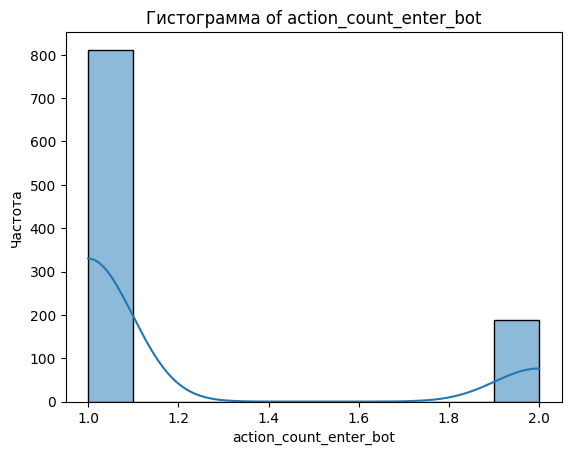

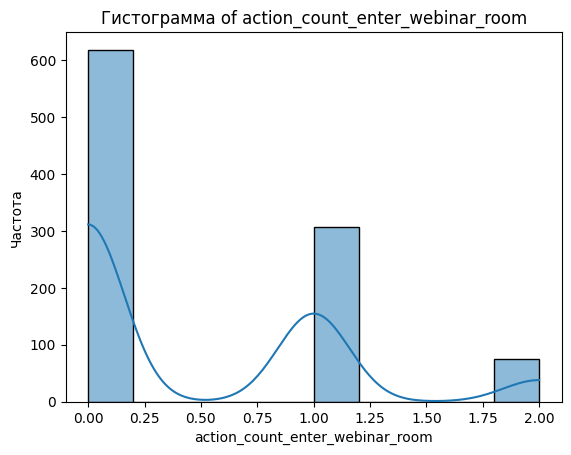

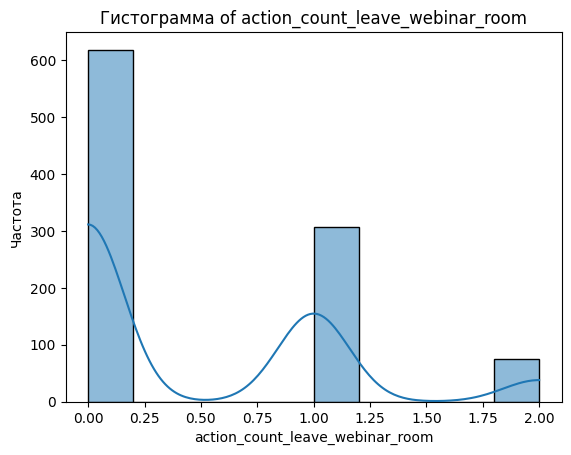

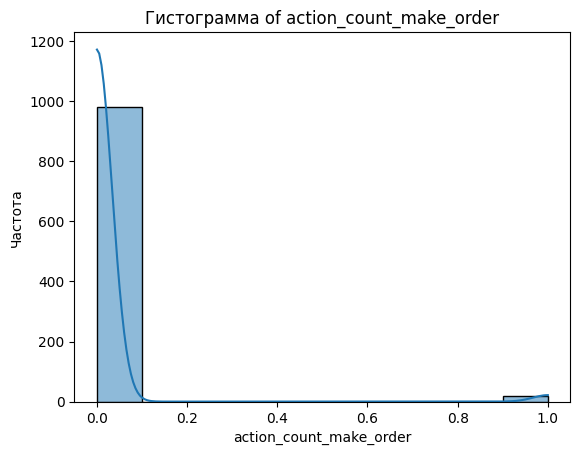

In [84]:
for col in pivot.columns:
    if col == 'user_id':
        continue  # Пропустить user_id column
    plt.figure()
    sns.histplot(pivot[col].dropna(), bins=10, kde=True)
    plt.title(f'Гистограмма of {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

Видим, что пользователи заходят в бота максимум 2 раза. Поэтому если бот перегружен сообщениями (их больше 2 на пользователя), то мы видим некоторое подтверждение гипотезы, что пользователей надо пушить менее активно: вероятно, они перегреты, поэтому перестают читать бота и/или ставят его на мьют. Для более точного ответа на этот вопрос необходимо сопоставить количество сообщений от бота на пользователя с количеством открываний бота пользователем.

C:\Users\leschuk\AppData\Local\Temp\ipykernel_18864\3999099302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['time_span_hours'] = filtered['time_span'].dt.total_seconds()/3600


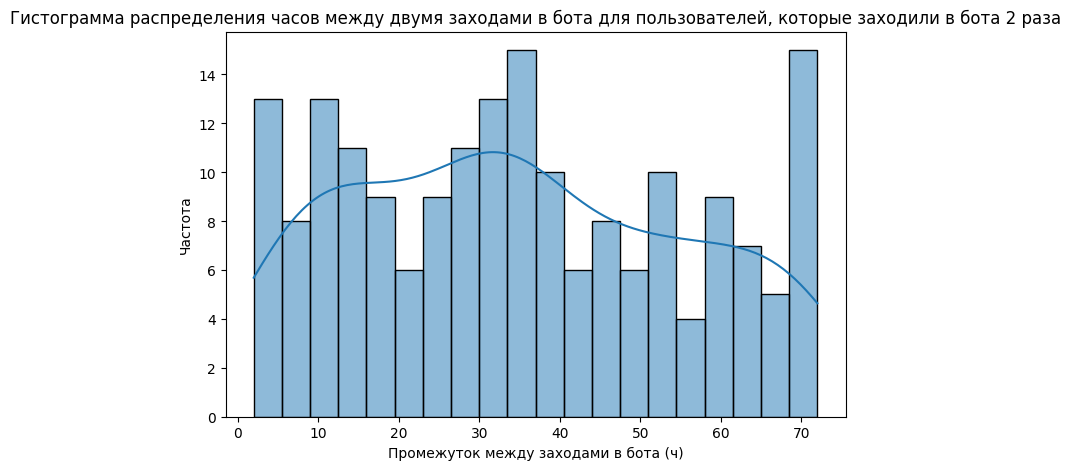

In [82]:
# Фильтруем данные
filtered = user_action_stats.query('(action == "enter_bot") & (time_span > @pd.Timedelta(0))')

# Конвертируем time_span в часы
filtered['time_span_hours'] = filtered['time_span'].dt.total_seconds()/3600

# Рисуем гистограмму
plt.figure(figsize=(8, 5))
sns.histplot(filtered['time_span_hours'], bins=20, kde=True)
plt.title('Гистограмма распределения часов между двумя заходами в бота для пользователей, которые заходили в бота 2 раза')
plt.xlabel('Промежуток между заходами в бота (ч)')
plt.ylabel('Частота')
plt.show()

По распределению времени захода в бота ничего определенного сказать нельзя, распределение не похоже на нормальное.

#### 2. Заход в вебинар -> выход из вебинара

In [89]:
# Построим график распределения времени просмотра вебинара. Для этого подготовим данные
#Т.к. пользователь может переподключаться к вебинару (мы видели больше 1 захода на вебинар в данных), берем минимум
enter_times = df[df['action'] == 'enter_webinar_room'].groupby('user_id')['created_at'].min().reset_index()
enter_times = enter_times.rename(columns={'created_at': 'enter_time'})

#Т.к. пользователь может переподключаться к вебинару (мы видели больше 1 захода на вебинар в данных), берем максимум (последний выход)
leave_times = df[df['action'] == 'leave_webinar_room'].groupby('user_id')['created_at'].max().reset_index()
leave_times = leave_times.rename(columns={'created_at': 'leave_time'})

# Соединяем датафреймы
webinar_times = pd.merge(enter_times, leave_times, on='user_id', how='inner')

# Считаем время просмотра вебинара
webinar_times['duration_minutes'] = (webinar_times['leave_time'] - webinar_times['enter_time']).dt.total_seconds() / 60

np.float64(4392.0)

In [92]:
users_with_two_enters = pivot.query('action_count_enter_webinar_room > 1').user_id

<Axes: >

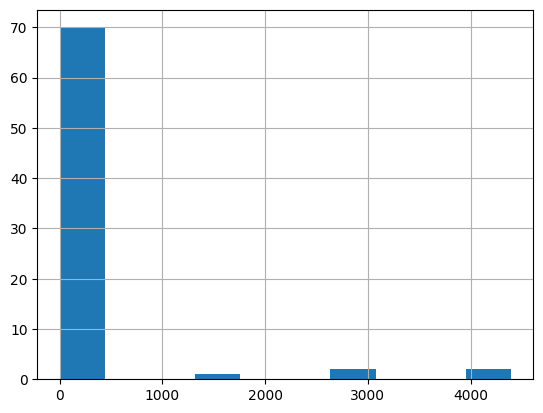

In [94]:
webinar_times.query("user_id in @users_with_two_enters").duration_minutes.hist()

Видим, что для части пользователей время между первым входом и последним выходом с вебинара явно больше, чем продолжительность вебинара (допустим, 2 часа). Соответственно, почти наверное это лояльные пользователи, которые посетили несколько вебинаров или пользователи, которые в первый раз не смогли посмотреть вебинар, поэтому подключились на следующий. 

In [99]:
users_with_two_webinars = webinar_times.query('(user_id in @users_with_two_enters)&(duration_minutes>120)').user_id

In [102]:
two_webinars = df.query('(action in ("enter_webinar_room", "leave_webinar_room"))&(user_id in @users_with_two_webinars)')

In [103]:
two_webinars

,user_id,action,created_at
878,430,enter_webinar_room,2025-05-22 18:07:00
879,430,leave_webinar_room,2025-05-22 18:22:00
882,430,enter_webinar_room,2025-05-24 18:49:00
883,430,leave_webinar_room,2025-05-24 19:17:00
1756,834,enter_webinar_room,2025-05-30 18:22:00
1757,834,leave_webinar_room,2025-05-30 18:33:00
1759,834,enter_webinar_room,2025-05-31 19:48:00
1760,834,leave_webinar_room,2025-05-31 19:52:00
1996,953,enter_webinar_room,2025-05-17 18:06:00
1997,953,leave_webinar_room,2025-05-17 19:16:00


Отсмотрев данные глазами, видим, что скорее всего пользователи 430, 971 -- это пользователи, которые не успели посмотреть первый вебинар и подключились на второй. Пользователь 834 не успел посмотреть ни одной из вебинаров (или ему не понравился ни один из вебинаров), пользователи 982 и 953 - это наши лояльники. В любом случае, возьмем для них продолжительность просмотра равную максимальной продолжительности просмотра вебинара 

In [104]:
# Получаем мин и макс
agg = two_webinars.groupby(['user_id', 'action'])['created_at'].agg(['min', 'max']).unstack('action')

# Считаем время, проведенное на первом и на втором вебинаре
min_delta = (agg['min', 'enter_webinar_room'] - agg['min', 'leave_webinar_room']).abs()
max_delta = (agg['max', 'enter_webinar_room'] - agg['max', 'leave_webinar_room']).abs()

# Берем максимум, конвертируем в минуты
result = pd.DataFrame({
    'max_timedelta_minutes': pd.concat([min_delta, max_delta], axis=1).max(axis=1).dt.total_seconds() / 60
})

print(result)

         max_timedelta_minutes
user_id                       
430                       28.0
834                       11.0
953                       70.0
971                       18.0
982                       68.0


In [108]:
#Поправим датафрейм с временем просмотра вебинара
webinar_times_updated = webinar_times.copy()

result_reset = result.reset_index()

webinar_times_updated = webinar_times_updated.merge(
    result_reset[['user_id', 'max_timedelta_minutes']],
    on='user_id',
    how='left'
)

webinar_times_updated['duration_minutes'] = webinar_times_updated['max_timedelta_minutes'].combine_first(webinar_times_updated['duration_minutes'])

webinar_times_updated = webinar_times_updated.drop(columns=['max_timedelta_minutes'])

webinar_times_updated.duration_minutes.describe()

count    382.000000
mean      33.306283
std       29.929803
min        0.000000
25%        8.000000
50%       23.000000
75%       53.750000
max      115.000000
Name: duration_minutes, dtype: float64

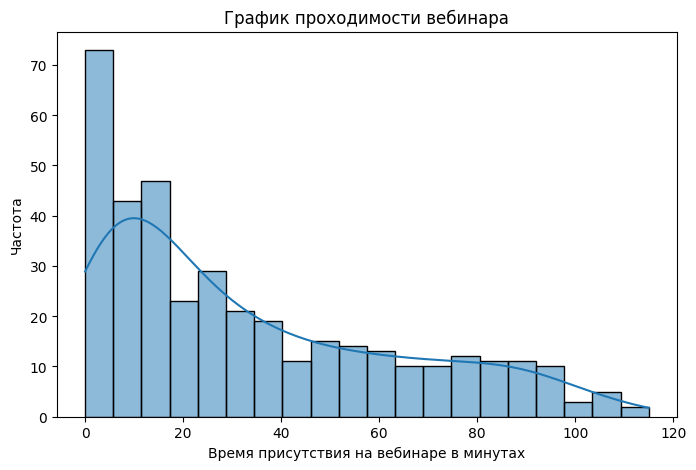

In [114]:
plt.figure(figsize=(8, 5))
sns.histplot(webinar_times_updated['duration_minutes'].dropna(), bins=20, kde=True)
plt.title('График проходимости вебинара')
plt.xlabel('Время присутствия на вебинаре в минутах')
plt.ylabel('Частота')
plt.show()

По графику видим относительно нормальный график проходимости вебинара, тем не менее, подсветим несколько интересных моментов.

In [117]:
print(webinar_times_updated.query('duration_minutes<1').user_id.nunique())

7


7 пользователей (2% участников) не пробыли на вебинаре и минуты. Вероятно, у них возникли технические проблемы. Этих юзеров как раз и можно отловить триггером "пробыл на вебинаре меньше минуты" и пушить их в бот вопросом, все ли нормально по технической части. Не самая приоритетная гипотеза, но часть лидов нам сохранит

In [116]:
print(webinar_times_updated.query('duration_minutes<20').user_id.nunique())

178


Почти половина пользователей отваливаются через 20 минут вебинара (когда примерно первый раз отвлекается внимание по психологическим причинам). За этим могут стоять 2 гипотезы, выдвинутые нами ранее: 1) надо работать над качеством лекции (соответственно, уменьшать долю отвала); 2) надо приводить больше целевых лидов на лендинг и работать с ним (потестировать разные лендинги и посмотреть, спросить у отвалившихся пользователей, почему они отвалились перед этим)

#### 3. Заход в вебинар -> Бронь на скидку

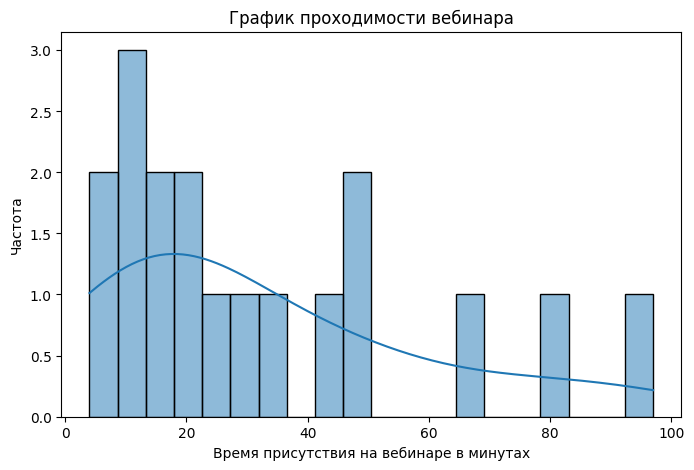

In [118]:
# А теперь построим такую же гистограмму проходимости по клиентам, которые у нас заказ сделали
orders_users = pivot.query('action_count_make_order > 0').user_id
plt.figure(figsize=(8, 5))
sns.histplot(webinar_times_updated.query('user_id in @orders_users')['duration_minutes'].dropna(), bins=20, kde=True)
plt.title('График проходимости вебинара')
plt.xlabel('Время присутствия на вебинаре в минутах')
plt.ylabel('Частота')
plt.show()

Видим, что наши итоговые клиенты смотрят вебинар дольше, поэтому работать над проходимостью вебинара оправданно. На всякий случай проверим это тестом Манна-Уитни (выборка небольшая, лучше сравнивать медианы, а не средние значения)

In [130]:
# Делим на 2 группы
group1 = webinar_times_updated.query('user_id in @orders_users')['duration_minutes'].dropna()
group2 = webinar_times_updated.query('user_id not in @orders_users')['duration_minutes'].dropna()

# Считаем тест. Exact, т.к. наблюдений мало
stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided', method = 'exact')

print(f"Mann-Whitney U statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Разница значима (p < 0.05).")
else:
    print("Разница не значима (p >= 0.05).")

Mann-Whitney U statistic: 3438.5
P-value: 0.726097578490096
Разница не значима (p >= 0.05).


Не получили должного подтверждения нашей гипотезе, поэтому слишком много бюджета инвестировать в качество вебинара не стоит. В любом случае это надо перепроверить на более крупной выборке юзеров, используя уже t-test, наша выборка очень мала, поэтому тесту могло не хватить мощности.

In [132]:
pivot.query('user_id in @users_with_two_webinars')

,user_id,action_count_enter_bot,action_count_enter_webinar_room,action_count_leave_webinar_room,action_count_make_order
429,430,2.0,2.0,2.0,1.0
833,834,2.0,2.0,2.0,0.0
952,953,2.0,2.0,2.0,0.0
970,971,2.0,2.0,2.0,1.0
981,982,2.0,2.0,2.0,0.0


In [133]:
two_webinars

,user_id,action,created_at
878,430,enter_webinar_room,2025-05-22 18:07:00
879,430,leave_webinar_room,2025-05-22 18:22:00
882,430,enter_webinar_room,2025-05-24 18:49:00
883,430,leave_webinar_room,2025-05-24 19:17:00
1756,834,enter_webinar_room,2025-05-30 18:22:00
1757,834,leave_webinar_room,2025-05-30 18:33:00
1759,834,enter_webinar_room,2025-05-31 19:48:00
1760,834,leave_webinar_room,2025-05-31 19:52:00
1996,953,enter_webinar_room,2025-05-17 18:06:00
1997,953,leave_webinar_room,2025-05-17 19:16:00


Возвращаясь к анализу пользователей, посетивших 2 вебинара, видим, что пользователи, которые не успели посмотреть первый вебинар и подключились на второй (выделили именно их на предыдущем этапе анализа) оказались нашими покупателями. Вероятно, можно внедрить еще один триггер. "Если посмотрели меньше 20 минут вебинара, написать что-то типа "Видим, что у вас не хватило времени посетить наш вебинар числа X. Следующий вебинар будет числа Y. Хотите прийти? Нажмите кнопку "Да" и мы пришлем ссылку".
Так мы покажем, что клиент нам важен и нам реально важно донести до него информацию с вебинара. Учитывая, что отвалившихся за первые 20 минут около из них, часть из них может оказаться теми, кто просто не смог выделить на вебинар нужное количество времени. Их и надо вернуть в нашу воронку.

#### 4. Итоги анализа

1) Мы видим, что наиболее сильно проседает конверсия из вебинара в заказ (38% из реги в вебинар, 5% из вебинара в заказ), на этом этапе воронке и нужно сконцентрироваться, а гипотезам ранее по воронке уделять меньше внимания
2) Бот может быть перегрет сообщениями (пользователи заходят в него более 1 раза, но не более 2). Валидировать это данными о количестве сообщений на пользователя. Гипотеза второго приоритета
3) 2% участников вебинара отключаются в первую минуту. Возможно, у них технические проблемы, их надо догонять в боте (гипотеза второго приоритета)
4) Почти половина пользователей отваливается в первые 20 минут вебинара. Надо посмотреть, что не так с нашим контентом, сделать кастдев, фокус-группы (если недорого). Не слишком много инвестировать в проходимость, т.к. на приведенных данных ее влияние на формирование заказа не подтверждается статистически значимо. Перепроверить эту взаимосвязь на более масштабной выборке.
5) Наши лиды могут быть нецелевыми, надо еще раз посмотреть, что конкретно мы продаем на лендинге и привлекает ли это именно наших потенциальных клиентов (гипотеза 2-го приоритета)
5) Видим, что пользователи, которые не успели посмотреть первый вебинар и подключились на второй (выделили именно их на предыдущем этапе анализа) оказались нашими покупателями. Можем ввести еще один пуш по триггеру, предлагающий тем, кто рано отключился, посетить еще 1 вебинар) (гипотеза 1-го приоритета)